Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Reading the dataset

In [3]:
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('drive/MyDrive/DV_A3_Aditi/youtube_videos.csv')
#data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Filtering the dataset

In [4]:
most_viewed_videos = 300
data = data.nlargest(most_viewed_videos, 'view_count')
#data = data.sort_values('view_count')
#data[:300]
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,categoryName,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,Music,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152568,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,Music,2022-09-09T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,12937252,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152365,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,Music,2022-09-08T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,268758295,12882841,0,3504692,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152175,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,Music,2022-09-07T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,264459017,12829059,0,3491132,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,Music,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...


In [5]:
required_features = ['video_id','view_count', 'likes', 'dislikes', 'comment_count', 'title', 'categoryName', 'trending_date']
metrics = ['view_count', 'likes', 'dislikes', 'comment_count']
featured_data = data[required_features]
data = data[metrics]
data

,view_count,likes,dislikes,comment_count
152788,277791741,12993894,0,3534337
152568,273162966,12937252,0,3516745
152365,268758295,12882841,0,3504692
152175,264459017,12829059,0,3491132
56374,264407389,16021534,150989,6738537
...,...,...,...,...
216557,112042188,7965106,0,929813
190374,111674925,2751539,0,150681
89131,111662438,4297565,50710,230022
127582,111477556,6496912,0,353082


In [6]:
filtered_data = pd.DataFrame(data)
filtered_data.to_csv('/content/drive/MyDrive/DV_A3_Aditi/youtube_videos_filtered_metrics_top300.csv', index=False)

Scatter Plot Matrix before k-means clustering

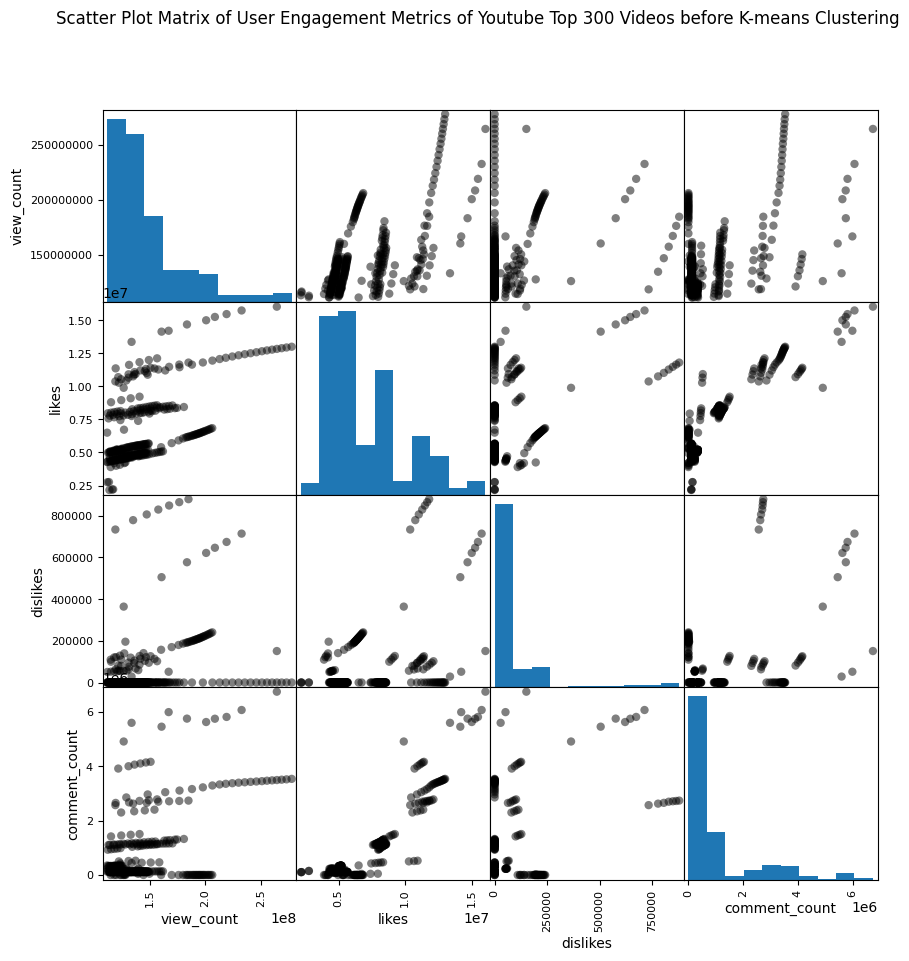

In [7]:
pd.plotting.scatter_matrix(data[metrics], figsize=(10,10), grid=True, marker='o', c='black')
plt.suptitle("Scatter Plot Matrix of User Engagement Metrics of Youtube Top 300 Videos before K-means Clustering")
plt.show()

Normalizing the data for Clustering with StandardScaler

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

K-means Clustering

In [9]:
num_of_clusters = 2

k_clustering = KMeans(num_of_clusters, random_state=42)

data['clusters'] = k_clustering.fit_predict(scaled_data)

#clusters = clust.predict(data)

#data['clusters'] = clusters.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting the Scatter Plot Matrix After k-means

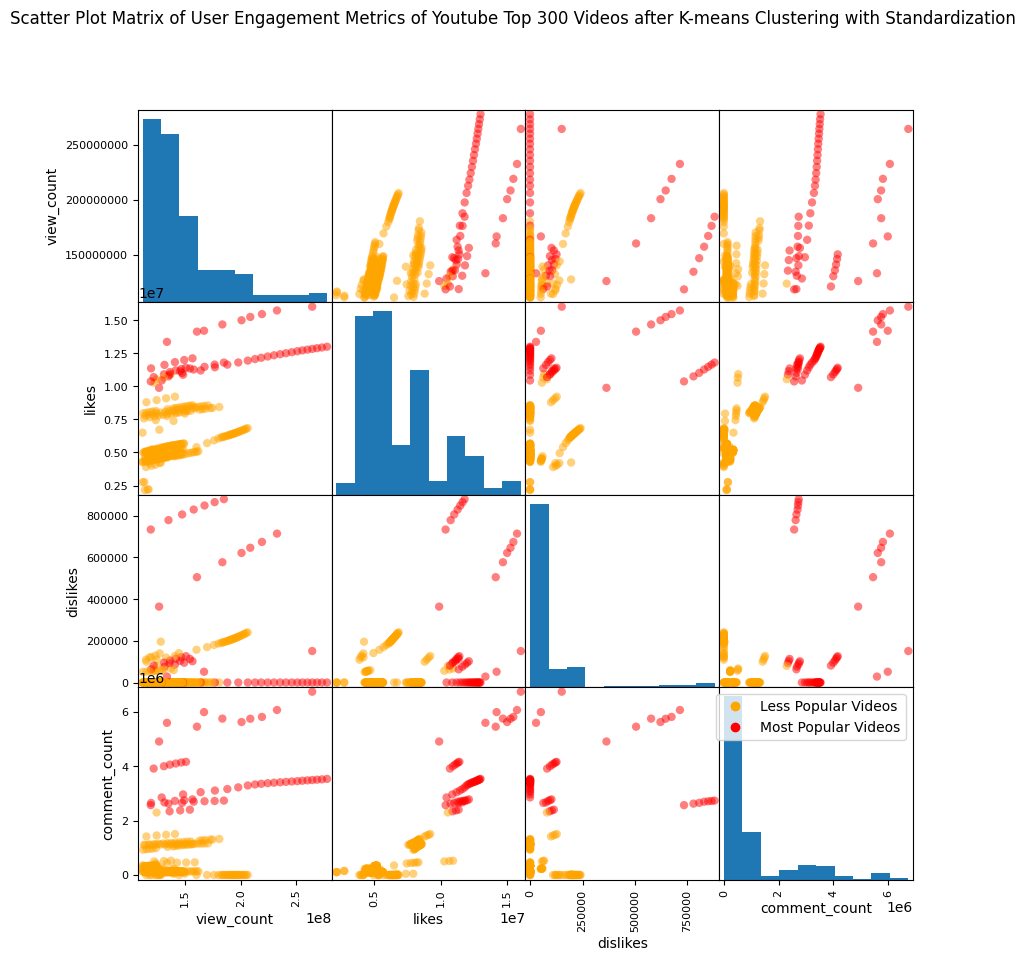

In [10]:
cluster_colors = {0:'orange', 1:'red'}
#scale = 100.0 * np.random.rand(most_viewed_videos) | s=scale
pd.plotting.scatter_matrix(data[metrics], figsize=(10,10), grid=True, marker='o', alpha=0.5, c = data['clusters'].map(cluster_colors))
labels = [plt.Line2D((0, 1), (0, 0), color=color, marker='o', linestyle='') for color in ['orange', 'red']]
plt.legend(labels, ['Less Popular Videos', 'Most Popular Videos'], loc='upper right')
plt.suptitle("Scatter Plot Matrix of User Engagement Metrics of Youtube Top 300 Videos after K-means Clustering with Standardization")
plt.show()

Scatter Plot Matrix with Plotly (To add the hovering effect)

In [11]:
fig = px.scatter_matrix(data[metrics], title='Scatter Plot Matrix of User Engagement Metrics of Youtube Top 300 Videos - Plotly')
fig.show()

In [12]:
fig = px.scatter_matrix(
    data, title='Scatter Plot Matrix of User Engagement Metrics of Youtube Top 300 Videos after K-means Clustering - Plotly',
    dimensions = metrics, color='clusters',
    hover_data='clusters',
    color_continuous_scale=['orange','red']
    )
fig.show()